In [2]:
import pandas as pd
import metpy.calc as mc
from metpy.units import units
import numpy as np

In [296]:
def readBSmooring(file,skip=130):
    h = ['nnn','Year','Mn','Dy','Hr','Mi','s/n','SpSound','DirTr','SpeedBin','Depth','VelUp','VelErr','%good4','corr1','corr2','corr3','corr4','CorrAve','inten1','inten2','inten3','inten4','Julianday']
    c =pd.read_table(file, names=h,skiprows=skip, delim_whitespace=True)
    b = c.drop([0])
    t = []
    for index, a in b.iterrows():
        t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' '+str(int(a.Hr))+':'+str(a.Mi)))
    b['datetime']=t
    b = b[b.SpeedBin!=9999.9]
    u,v, = [],[]
    for index, c in b.iterrows():
        ui,vi = mc.wind_components(c.SpeedBin*units('cm/s'),(c.DirTr-180)*units.deg)
        u.append(ui)
        v.append(vi)
    b['u'] = u
    b['v'] = v
    b = b[(b.SpeedBin < 1000) *(b.DirTr < 1000) ]
    
    return b
    
    
def readBSmooringSBE(file,skip=130):
    h = ['nnn','Year','Mn','Dy','Hr','Mi','PresR','PresD','Depth','Temp','Cond','Sal','Julianday']
    b = pd.read_table(file, names=h,skiprows=skip,delim_whitespace=True)
    b = b.dropna()
    t = []
    for index, a in b.iterrows():
            if a.Hr == 24:
                t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' 0:'+str(a.Mi)))
            else:
                t.append(pd.to_datetime(str(int(a.Year))+'-'+str(int(a.Mn))+'-'+str(int(a.Dy))+' '+str(int(a.Hr))+':'+str(a.Mi)))
    b['datetime']=t
    return b

dfs = []
for year in [2011,2012,2013,2016,2017,2018]:
    dfs.append(readBSmooringSBE('../data/physicalData/beringStrait/BeringStrait_'+str(year)+'_A3_SBE.txt',skip=131)) 
dfCTD = pd.concat(dfs)

dfs = []
for year,skipR in zip([2011,2012,2013,2016,2017,2018],[170,173,204,130,140,145]):
    dfs.append(readBSmooring('../data/physicalData/beringStrait/BeringStrait_'+str(year)+'_A3_11.rdat',skip=skipR))
dfVel = pd.concat(dfs)   
dfVel['daySinceJ']= dfVel.datetime.apply(lambda x:(x - pd.to_datetime('01-01-'+str(x.year))).total_seconds()/(60*60*24))

C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:203: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\rober\Anaconda3\lib\site-packages\pandas\core\computation\e

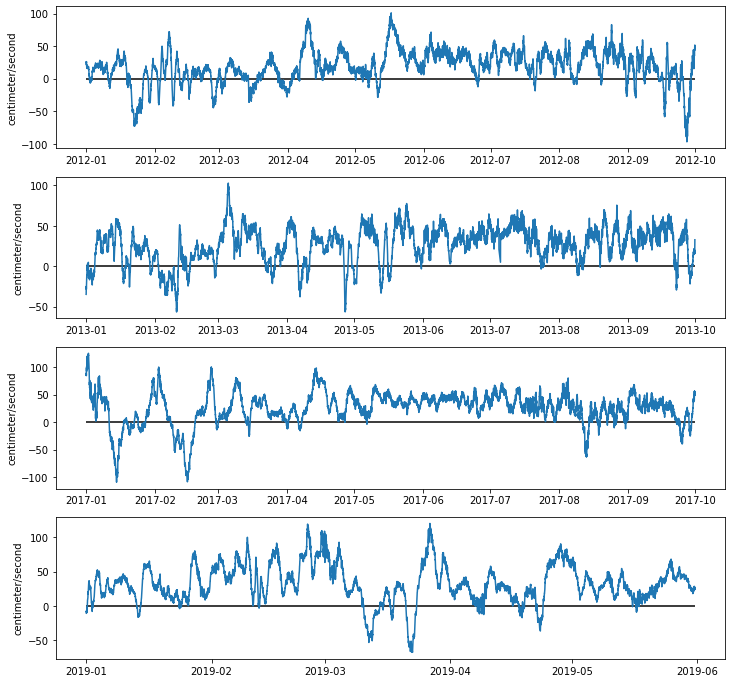

In [77]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig = plt.figure(figsize=(12,12))
plt.subplot(411)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2012-01-01')) & (dfVel.datetime < pd.to_datetime('2012-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(412)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2013-01-01')) & (dfVel.datetime < pd.to_datetime('2013-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(413)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2017-01-01')) & (dfVel.datetime < pd.to_datetime('2017-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')
plt.subplot(414)
dCur = dfVel[(dfVel.datetime >= pd.to_datetime('2019-01-01')) & (dfVel.datetime < pd.to_datetime('2019-10-01'))]
plt.plot(dCur.datetime, dCur.v)
plt.hlines([0], dCur.datetime.iloc[0], dCur.datetime.iloc[-1],'k')

In [297]:
fig = plt.figure(figsize=(12,12))

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-01-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=1)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=1)


df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-02-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-02-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-02-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-02-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.7)

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-03-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-03-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-03-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.4)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-03-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.4)

df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-04-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'k', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-04-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-04-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.2)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-04-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'r', linestyle='-',alpha=0.2)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()

plt.legend(['2012','2013','2017','2019'])
plt.xlabel('Days since January 1st')

AttributeError: 'DataFrame' object has no attribute 'daySinceJ'

<Figure size 864x864 with 0 Axes>

In [164]:
dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))]

,nnn,Year,Mn,Dy,Hr,Mi,s/n,SpSound,DirTr,SpeedBin,...,CorrAve,inten1,inten2,inten3,inten4,Julianday,datetime,u,v,daySinceJ
7005,7005,2019.0,1.0,1.0,0.0,3.0,2332.0,1439000.0,170.8,7.8,...,126.0,126.0,99.0,96.0,100.0,101.0,2019-01-01 00:03:00,1.2470732639963105 centimeter / second,-7.699662867569305 centimeter / second,0.002083
7006,7006,2019.0,1.0,1.0,0.0,33.0,2332.0,1439000.0,217.6,9.5,...,125.0,126.0,102.0,99.0,101.0,104.0,2019-01-01 00:33:00,-5.796379057062041 centimeter / second,-7.526751611874312 centimeter / second,0.022917
7007,7007,2019.0,1.0,1.0,1.0,3.0,2332.0,1439000.0,174.9,10.3,...,128.0,126.0,99.0,93.0,99.0,102.0,2019-01-01 01:03:00,0.9156112577243467 centimeter / second,-10.259222973730928 centimeter / second,0.043750
7008,7008,2019.0,1.0,1.0,1.0,33.0,2332.0,1439000.0,171.5,11.0,...,127.0,126.0,100.0,102.0,103.0,106.0,2019-01-01 01:33:00,1.625903522425717 centimeter / second,-10.879174496981085 centimeter / second,0.064583
7009,7009,2019.0,1.0,1.0,2.0,3.0,2332.0,1439000.0,175.2,10.0,...,126.0,126.0,102.0,102.0,104.0,108.0,2019-01-01 02:03:00,0.8367784333231569 centimeter / second,-9.964928592495044 centimeter / second,0.085417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14219,14219,2019.0,5.0,31.0,7.0,5.0,2332.0,1446000.0,331.0,31.7,...,126.0,125.0,97.0,93.0,98.0,101.0,2019-05-31 07:05:00,-15.368464961808888 centimeter / second,27.725444716318844 centimeter / second,150.295139
14220,14220,2019.0,5.0,31.0,7.0,35.0,2332.0,1446000.0,328.4,32.5,...,126.0,123.0,100.0,98.0,105.0,103.0,2019-05-31 07:35:00,-17.029541944027585 centimeter / second,27.681125359649037 centimeter / second,150.315972
14221,14221,2019.0,5.0,31.0,8.0,5.0,2332.0,1446000.0,328.2,27.9,...,126.0,122.0,102.0,100.0,107.0,105.0,2019-05-31 08:05:00,-14.702066694357308 centimeter / second,23.712006134333496 centimeter / second,150.336806
14222,14222,2019.0,5.0,31.0,8.0,35.0,2332.0,1446000.0,332.0,30.4,...,127.0,128.0,101.0,101.0,104.0,104.0,2019-05-31 08:35:00,-14.271935508691076 centimeter / second,26.84160682291138 centimeter / second,150.357639


Text(0.5, 0, 'Days since January 1st')

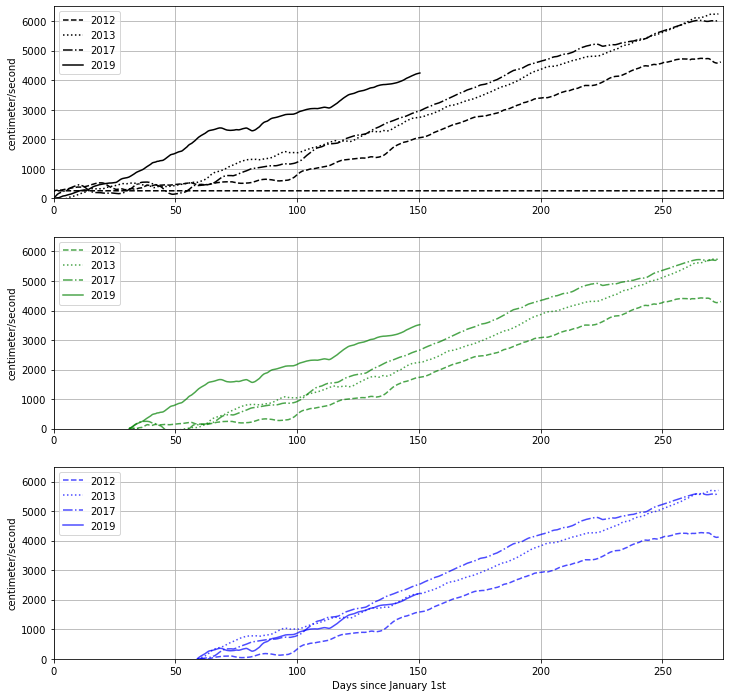

In [295]:
fig = plt.figure(figsize=(12,12))
plt.subplot(311)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2011-11-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'--k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),':k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'-.k')
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),'-k')
plt.grid()
plt.ylim(0,6500)
plt.xlim(0,275)
plt.legend(['2012','2013','2017','2019'])

plt.subplot(312)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-02-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='--',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-02-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle=':',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-02-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-.',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-02-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'g', linestyle='-',alpha=0.7)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()
plt.legend(['2012','2013','2017','2019'])

plt.subplot(313)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2012-03-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='--',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2013-03-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle=':',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2017-03-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-.',alpha=0.7)
df = dfVel[(dfVel.datetime>= pd.to_datetime('2019-03-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))]
plt.plot(df.daySinceJ,np.cumsum(df.v*60*30/100/1000),color = 'b', linestyle='-',alpha=0.7)
plt.ylim(0,6500)
plt.xlim(0,275)
plt.grid()

plt.legend(['2012','2013','2017','2019'])
plt.xlabel('Days since January 1st')

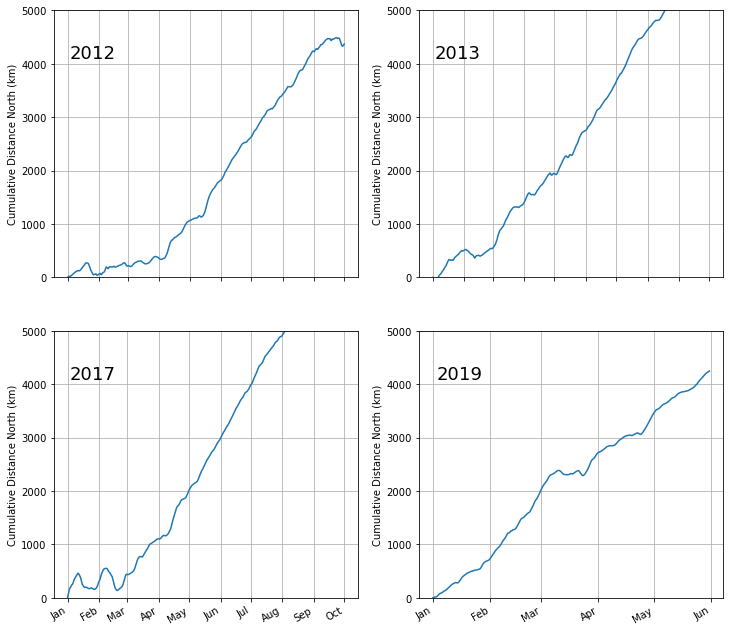

In [109]:
def cumNplot(df):
    plt.plot(df.datetime,np.cumsum(df.v*60*30/100/1000))
    plt.grid()
    plt.text(df.datetime.iloc[100],4100,str(int(df.Year.unique()[0])),fontsize=18)
    ax = plt.gca()
    ax.set_ylim(0,5000)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    fig.autofmt_xdate()
    plt.ylabel('Cumulative Distance North (km)')

fig = plt.figure(figsize=(12,12))
plt.subplot(221)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2012-01-01'))&(dfVel.datetime< pd.to_datetime('2012-10-01'))])
plt.subplot(222)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2013-01-01'))&(dfVel.datetime< pd.to_datetime('2013-10-01'))])
plt.subplot(223)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2017-01-01'))&(dfVel.datetime< pd.to_datetime('2017-10-01'))])
plt.subplot(224)
cumNplot(dfVel[(dfVel.datetime>= pd.to_datetime('2019-01-01'))&(dfVel.datetime< pd.to_datetime('2019-10-01'))])

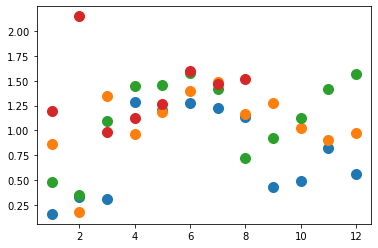

In [294]:
dfMonthly = pd.read_csv('../data/physicalData/beringStrait/monthlytransport.csv',names = ['index','mooring','year','month','mean','error','meanCorr','errorCorr'],skiprows=1,na_values='#NUM!')
plt.plot(dfMonthly[dfMonthly.year == 2012].month,dfMonthly[dfMonthly.year == 2012].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2013].month,dfMonthly[dfMonthly.year == 2013].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2017].month,dfMonthly[dfMonthly.year == 2017].meanCorr,'.',markersize=20)
plt.plot(dfMonthly[dfMonthly.year == 2019].month,dfMonthly[dfMonthly.year == 2019].meanCorr,'.',markersize=20)
#dfMonthly